In [1]:
#upgrade matplotlib library

!pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.6 MB 653.6 kB/s eta 0:00:12
   --------------

   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20
   --- ------------------------------------ 0.6/7.6 MB 14.1 kB/s eta 0:08:20

In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset
df=pd.read_csv("Groceries_dataset.csv")

#check the first five rows
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#summary off the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#check availability of null values
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
#convert date to datetime format
df['date'] = pd.to_datetime(df['Date'])
df.info()

C:\Users\delll\AppData\Local\Temp\ipykernel_9816\2400879760.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


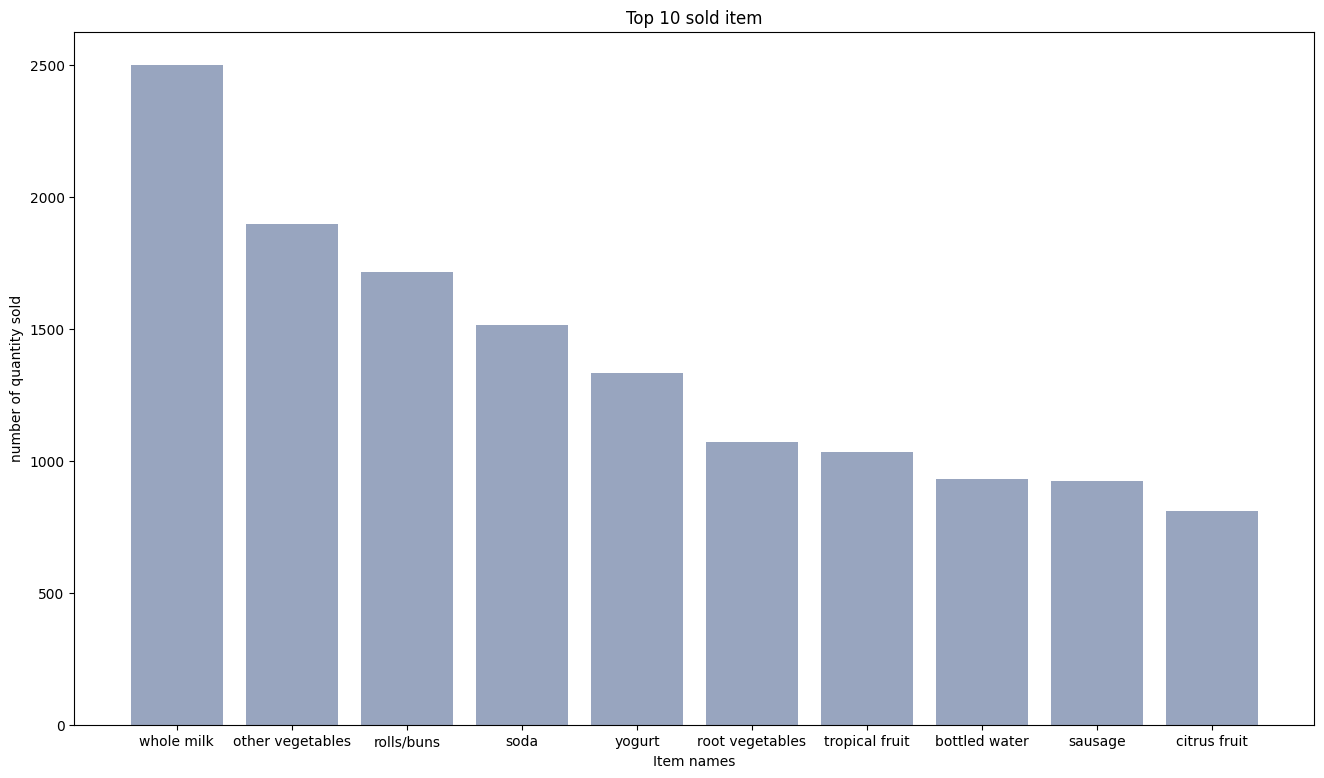

In [7]:
#Distribution of item sold
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold item")
plt.xlabel("Item names")
plt.ylabel("number of quantity sold")

plt.xticks(x_pos, bars)

plt.show()

In [8]:
#set date as index
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


C:\Users\delll\AppData\Local\Temp\ipykernel_9816\401525726.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_date.index = pd.to_datetime(df_date.index)


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

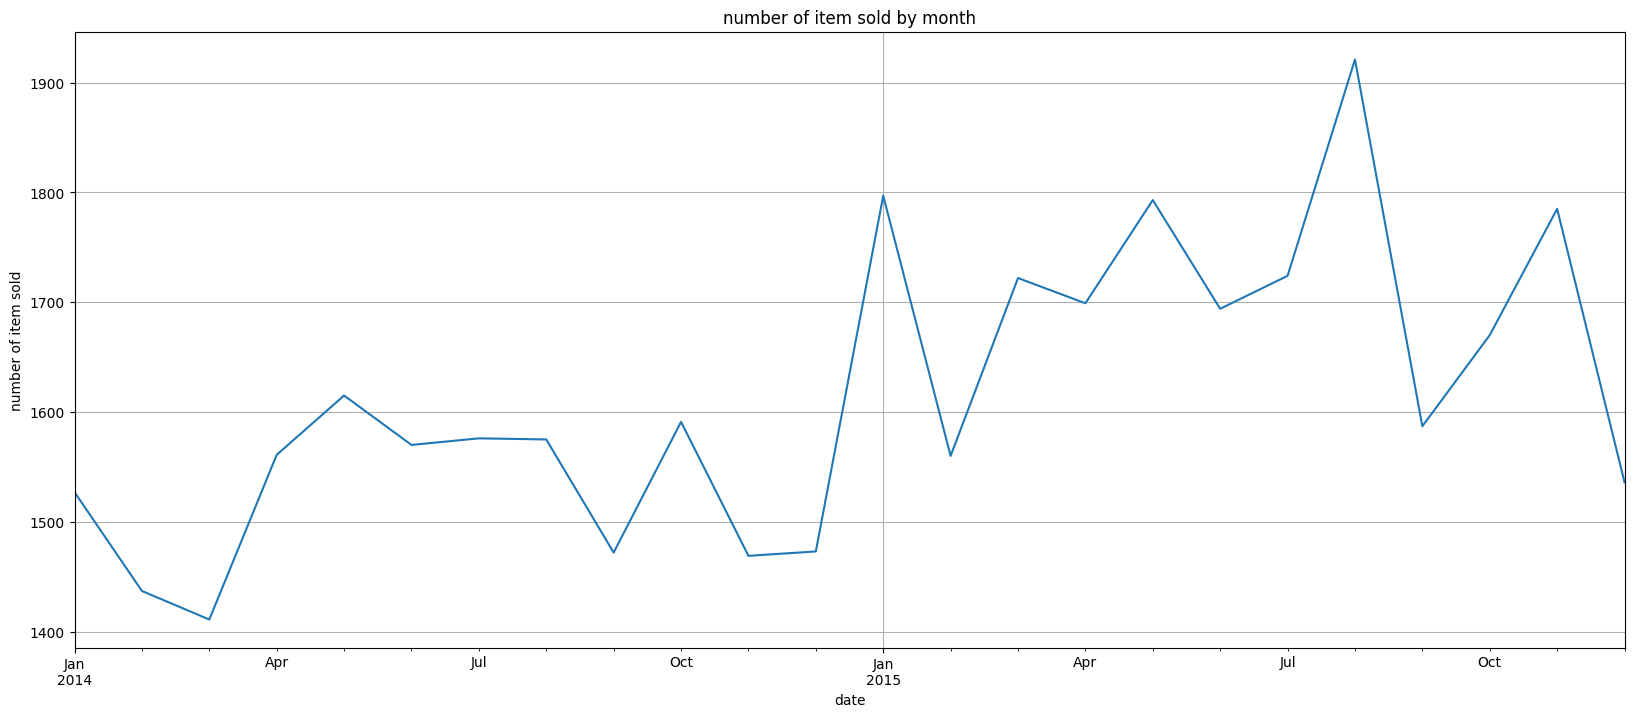

In [9]:
#number of items sold by month
df_date.index = pd.to_datetime(df_date.index)
df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = 'number of item sold by month').set(xlabel="date", ylabel= "number of item sold")

In [10]:
#selecting only required variable for modelling and removing whitespace if any
cust_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
#combine all the items in the list format for each customer
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [13]:
#install apyori
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=9168b86df718011b3815c8230e91c2c2e4d92b39f10e3529f3eed2096b9a540e
  Stored in directory: c:\users\delll\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [14]:
#import apriori from apyori for the model creation
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [15]:
#putting the results in list format for better view
results = list(rules)

In [16]:
#view the results
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [17]:
#obtain results from model in readable format
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidences', 'Lift'])

In [18]:
#recommendations
resultsindataframe.nlargest(n=10, columns="Lift")

,Left Hand Side,Right Hand Side,Support,Confidences,Lift
4915,bottled water,other vegetables,0.002052,"((bottled water, berries), (other vegetables, ...",14.654135
4914,bottled water,other vegetables,0.002052,"((bottled water, berries), (other vegetables, ...",12.068111
2674,beef,other vegetables,0.002052,"((beef, oil), (other vegetables, pork, soda), ...",11.524021
3573,brown bread,specialty chocolate,0.002052,"((brown bread, citrus fruit), (specialty choco...",11.443670
4133,long life bakery product,rolls/buns,0.002052,"((long life bakery product, citrus fruit), (ro...",11.105413
3290,bottled water,soda,0.002052,"((bottled water, oil), (soda, sausage, citrus ...",10.322410
2904,brown bread,misc. beverages,0.002309,"((brown bread, bottled beer), (misc. beverages...",9.533152
5045,bottled water,other vegetables,0.002052,"((bottled water, meat), (other vegetables, pas...",9.438257
2902,brown bread,domestic eggs,0.002052,"((brown bread, bottled beer), (domestic eggs, ...",9.415459
2734,bottled water,soda,0.002309,"((bottled water, berries), (soda, brown bread,...",9.232105
